In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('flightData.csv')

In [3]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [4]:
df = df.drop('Unnamed: 0',axis=1)

In [5]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [6]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [7]:
df['class'].unique()

array(['Economy', 'Business'], dtype=object)

In [8]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [10]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=labelEncoder.fit_transform(df[col])

In [12]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,2,2,2,5,5,1,2.17,1,5953
1,4,1387,2,1,2,4,5,1,2.33,1,5953
2,0,1213,2,1,2,1,5,1,2.17,1,5956
3,5,1559,2,4,2,0,5,1,2.25,1,5955
4,5,1549,2,4,2,4,5,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,5,1477,1,4,0,2,3,0,10.08,49,69265
300149,5,1481,1,0,0,5,3,0,10.42,49,77105
300150,5,1486,1,1,0,5,3,0,13.83,49,79099
300151,5,1483,1,1,0,2,3,0,10.00,49,81585


In [13]:
x = df.drop(['price'],axis=1)
y = df['price']

In [14]:
x

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,4,1408,2,2,2,5,5,1,2.17,1
1,4,1387,2,1,2,4,5,1,2.33,1
2,0,1213,2,1,2,1,5,1,2.17,1
3,5,1559,2,4,2,0,5,1,2.25,1
4,5,1549,2,4,2,4,5,1,2.33,1
...,...,...,...,...,...,...,...,...,...,...
300148,5,1477,1,4,0,2,3,0,10.08,49
300149,5,1481,1,0,0,5,3,0,10.42,49
300150,5,1486,1,1,0,5,3,0,13.83,49
300151,5,1483,1,1,0,2,3,0,10.00,49


In [15]:
y

0          5953
1          5953
2          5956
3          5955
4          5955
          ...  
300148    69265
300149    77105
300150    79099
300151    81585
300152    81585
Name: price, Length: 300153, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
print(x.shape, y.shape)

print(x_train.shape, y_train.shape)

print(x_test.shape, y_test.shape)

(300153, 10) (300153,)
(240122, 10) (240122,)
(60031, 10) (60031,)


In [18]:
from sklearn.preprocessing import MinMaxScaler

mmscaler=MinMaxScaler(feature_range=(0,1))

x_train=mmscaler.fit_transform(x_train)
x_test=mmscaler.fit_transform(x_test)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)  

In [19]:
x_train

,0,1,2,3,4,5,6,7,8,9
0,0.2,0.457692,0.8,0.0,0.0,0.8,0.2,1.0,0.379388,0.104167
1,0.6,0.070513,0.4,0.0,0.5,1.0,0.2,1.0,0.125918,0.250000
2,0.2,0.541667,0.8,0.0,0.0,0.0,0.2,0.0,0.415102,0.895833
3,1.0,0.974359,0.6,1.0,0.0,0.2,0.0,1.0,0.192245,0.208333
4,1.0,0.933333,0.8,1.0,0.0,1.0,0.2,0.0,0.523878,0.083333
...,...,...,...,...,...,...,...,...,...,...
240117,1.0,0.934615,0.8,0.4,0.0,0.0,0.4,1.0,0.401429,0.020833
240118,1.0,0.969872,0.0,1.0,0.0,1.0,0.2,0.0,0.501837,0.125000
240119,0.2,0.542308,0.8,1.0,0.0,0.8,1.0,1.0,0.262041,0.583333
240120,0.4,0.592308,0.8,0.0,0.0,1.0,0.6,1.0,0.153061,0.791667


In [20]:
x_test

,0,1,2,3,4,5,6,7,8,9
0,0.2,0.479487,0.4,0.8,0.0,0.2,0.8,1.0,0.403240,0.812500
1,1.0,0.924359,0.8,0.8,0.0,1.0,1.0,0.0,0.191816,0.854167
2,1.0,0.932051,0.8,0.8,0.0,1.0,0.0,1.0,0.206095,0.833333
3,1.0,0.948077,0.2,1.0,0.0,0.8,0.4,0.0,0.291347,0.270833
4,0.2,0.476282,0.0,0.0,0.0,1.0,1.0,1.0,0.158142,0.395833
...,...,...,...,...,...,...,...,...,...,...
60026,0.2,0.457051,0.4,0.2,0.0,0.4,1.0,1.0,0.250426,0.541667
60027,0.6,0.167949,0.4,0.4,1.0,1.0,1.0,1.0,0.028559,0.583333
60028,0.2,0.494231,0.6,0.2,0.0,1.0,0.0,1.0,0.271739,0.562500
60029,0.6,0.107692,0.6,0.4,1.0,0.4,0.8,1.0,0.024936,0.812500


In [21]:
y_train

148417    13524
36879      9940
274531    55983
166397     7927
272722    55502
          ...  
119879    22869
259178    44280
131932     5102
146867     5574
121958     6339
Name: price, Length: 240122, dtype: int64

In [22]:
y_test

27131      7366
266857    64831
141228     6195
288329    60160
97334      6578
          ...  
5234       5026
5591       3001
168314     6734
175191     5082
287693    66465
Name: price, Length: 60031, dtype: int64

In [40]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

# Assuming x_train, y_train, x_test, y_test are already defined

# Create instances of regression models
modelmlg = LinearRegression()
modeldcr = DecisionTreeRegressor()
modelbag = BaggingRegressor()
modelrfr = RandomForestRegressor()
modelXGR = xgb.XGBRegressor()
modelKNN = KNeighborsRegressor(n_neighbors=5)
modelETR = ExtraTreesRegressor()
modelRE = Ridge()
modelLO = linear_model.Lasso(alpha=0.1)

# List of models to iterate over
MM = [modelmlg, modeldcr, modelbag, modelrfr, modelXGR, modelKNN, modelETR, modelRE, modelLO]

# Initialize an empty list to collect results
results = []

# Evaluation loop
for model in MM:
    model.fit(x_train, y_train)  # Fit the model
    
    y_pred = model.predict(x_test)  # Predict with test data
    
    # Calculate evaluation metrics
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = metrics.r2_score(y_test, y_pred)
    rmsle = np.log(np.sqrt(mse))
    
    def MAPE(y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    mape = MAPE(y_test, y_pred)
    
    # Adjusted R-squared Calculation
    n = len(y_test)
    p = x_test.shape[1]
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    
    # Append results as dictionary to list
    results.append({'Model': type(model).__name__,
                    'Mean Absolute Error': round(mae, 3),
                    'Mean Squared Error': round(mse, 3),
                    'Root Mean Squared Error': round(rmse, 3),
                    'R2_score': round(r2, 6),
                    'Root Mean Squared Log Error': round(rmsle, 3),
                    'Mean Absolute Percentage Error': round(mape, 2),
                    'Adj R Square': round(adj_r2, 6)})

# Convert list of dictionaries to DataFrame
results_df = pd.DataFrame(results)

# Print or display results DataFrame
print(results_df)


                   Model  Mean Absolute Error  Mean Squared Error  \
0       LinearRegression             4628.895        4.919581e+07   
1  DecisionTreeRegressor             1206.172        1.270215e+07   
2       BaggingRegressor             1167.865        8.494985e+06   
3  RandomForestRegressor             1144.691        8.107290e+06   
4           XGBRegressor             1862.620        1.172786e+07   
5    KNeighborsRegressor             1827.009        1.434422e+07   
6    ExtraTreesRegressor             1116.496        7.623422e+06   
7                  Ridge             4628.911        4.919578e+07   
8                  Lasso             4628.783        4.919574e+07   

   Root Mean Squared Error  R2_score  Root Mean Squared Log Error  \
0                 7013.972  0.904564                        8.856   
1                 3564.007  0.975359                        8.179   
2                 2914.616  0.983520                        7.977   
3                 2847.330  0.984

In [41]:
results_df.sort_values(by='Mean Absolute Percentage Error', ascending=True)

,Model,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2_score,Root Mean Squared Log Error,Mean Absolute Percentage Error,Adj R Square
6,ExtraTreesRegressor,1116.496,7.623422e+06,2761.055,0.985211,7.923,7.37,0.985209
3,RandomForestRegressor,1144.691,8.107290e+06,2847.330,0.984272,7.954,7.65,0.984270
2,BaggingRegressor,1167.865,8.494985e+06,2914.616,0.983520,7.977,7.90,0.983518
1,DecisionTreeRegressor,1206.172,1.270215e+07,3564.007,0.975359,8.179,8.37,0.975355
5,KNeighborsRegressor,1827.009,1.434422e+07,3787.377,0.972173,8.239,10.77,0.972169
4,XGBRegressor,1862.620,1.172786e+07,3424.596,0.977249,8.139,14.04,0.977245
8,Lasso,4628.783,4.919574e+07,7013.968,0.904564,8.856,43.66,0.904548
0,LinearRegression,4628.895,4.919581e+07,7013.972,0.904564,8.856,43.67,0.904548
7,Ridge,4628.911,4.919578e+07,7013.970,0.904564,8.856,43.67,0.904548


From the Above Results, The Top 3 Models by comparing Errors , Adj_R_Square and R2_Score values are
1. ExtraTreesRegressor
2. RandomForestRegressor
3. Bagging Regressor

In [42]:
#Trainig the model with
modelETR.fit(x_train, y_train)
    
# Predict the model with test data

y_pred = modelETR.predict(x_test)

In [43]:
pred=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result=df.merge(pred,left_index=True,right_index=True)

In [44]:
result.sample(20)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Price_actual,Price_pred
91089,3,118,0,5,0,1,2,1,8.17,36,3288,3288,3355.91
277171,5,1520,3,5,0,4,2,0,11.00,48,47395,47395,49468.22
236017,1,863,5,4,0,2,4,0,9.17,25,49725,49725,49684.68
57558,3,11,5,1,0,4,0,1,5.50,28,4284,4284,4742.75
296281,5,1486,1,1,0,4,4,0,25.67,10,55377,55377,55377.00
187586,5,1492,1,5,0,4,5,1,14.08,2,15543,15543,15572.19
152879,5,1525,3,2,2,2,2,1,2.25,6,6238,6238,6291.79
33916,0,1218,2,0,0,5,3,1,9.08,40,2050,2050,3112.29
211947,5,1460,2,4,0,5,5,0,11.67,49,53164,53164,53164.00
18312,2,984,2,2,0,3,0,1,7.08,41,4205,4205,4186.87


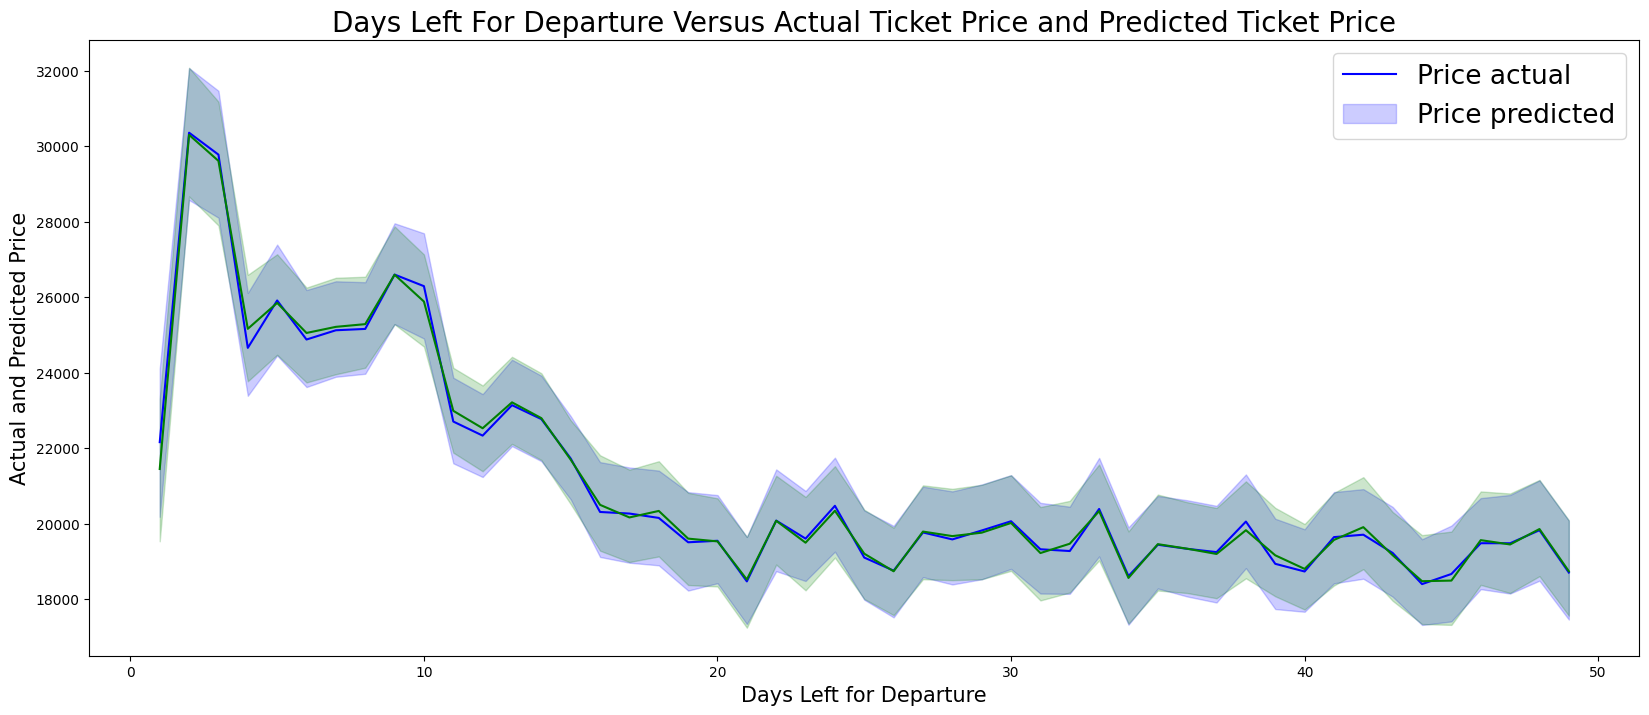

In [48]:
plt.figure(figsize=(20,8))
sns.lineplot(data=result,x='days_left',y='Price_actual',color='blue')
sns.lineplot(data=result,x='days_left',y='Price_pred',color='green')
plt.title('Days Left For Departure Versus Actual Ticket Price and Predicted Ticket Price',fontsize=20)
plt.legend(labels=['Price actual','Price predicted'],fontsize=19)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Actual and Predicted Price',fontsize=15)
plt.show()

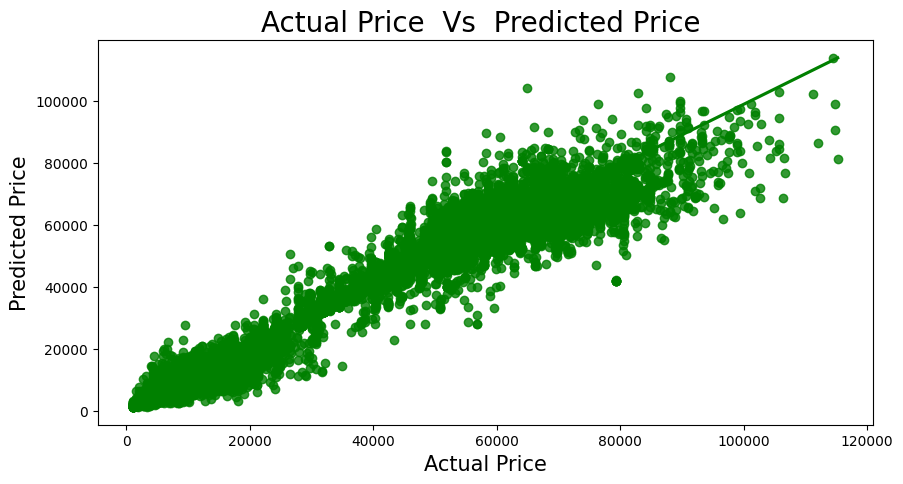

In [49]:
plt.figure(figsize=(10,5))
sns.regplot(x='Price_actual',y='Price_pred',data=result,color='green')
plt.title('Actual Price  Vs  Predicted Price ',fontsize=20)
plt.xlabel('Actual Price',fontsize=15)
plt.ylabel('Predicted Price',fontsize=15)
plt.show()